In [1]:
import matplotlib
import numpy as np 
import matplotlib.pyplot as plt
import math
%matplotlib inline

def printMap(level):
    pixel_plot = plt.figure()
    pixel_plot.add_subplot()
    plt.title("Map")
    pixel_plot = plt.imshow(level, cmap='Greens', interpolation='nearest', origin='upper', vmax=7)
    plt.colorbar(pixel_plot)
    plt.show()

def putPixel(level, position, value):
    x = position[0]
    y = position[1]
    level[y][x] = value

In [2]:
import math
# Ratkaistava ongelma

from search_algos import *

#alkutilanne:
initialState = [0, 0]
goalState = [15, 17]


# actionit taulukoituna: (0 suuntaa)
actions = [[-1, 0], [1, 0],[0, -1], [0, 1]]
#actions = [[-1, 0], [1, 0],[0, -1], [0, 1], [-1, -1], [1, 1], [1, -1], [-1, 1]]



level = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
   
]


# Laillisen tilan tarkastusfunktio:
def isLegalState(state):
    x = state[0]
    y = state[1]
    if( x < 0 or y < 0):
        return False
    if( y >= len(level) or x >= len(level[0]) ):
        return False
    return True
    


In [3]:
# leveysuunnattu dijkstra:
# goaledNode, openList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestG)

# ahne dijkstra:
#goaledNode, openList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestH)

# A*
goaledNode, openList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestF)

Total cost of path: 72.0


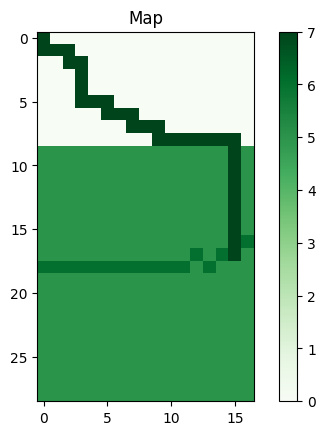

In [4]:


def printNodeOnLevel(node):
    putPixel(level, node.state, 7)

def printOpenNodeOnLevel(node):
    putPixel(level, node.state, 6)

traversePath(goaledNode, printNodeOnLevel)

for openNode in openList:
    printOpenNodeOnLevel(openNode)

print("Total cost of path: " + str(goaledNode.totalG))
printMap(level)

[Source](https://www.youtube.com/watch?v=Q30m_-8nh3Y&list=PLadRxrHJkUqzoVmzO-CQWwhO93IAjChOp&index=18)